# Using CyTargetLinker for a WikiPathway

Applications that were used: Cytoscape (v.3.8.2) and Jupyter Notebooks (v.2.2.6) through the Anaconda navigator (v.1.10.0).

In Cytoscape, the following apps were installed: CyTargetlinker (v.4.1.0), WikiPathways (v.3.3.7) and FileTransfer (v.1.1) for communication to Jupyter notebooks. 
To install apps in Cytoscape go to Apps -> App Manager -> Search

For those new to working with Jupyter Notebooks, go to the [MarkDown Tutorial](https://www.markdowntutorial.com/lesson/1/) to learn how to comment your code properly. 

Now let's move on to the code. 

### Step 1: Importing required packages

**os** = Allows the program to communicate with the users' operating system (e.g. search for files)  
**py4cytoscape** = Allows the user to use the python coding language for communicating with cytoscape 


In [1]:
import os
import py4cytoscape as p4c

### Step 2: Defining the Pathway

In the next piece of code we make a new variable called "WP_ID" and we assign it's value to the desired wikipathway. In this case, WikiPathway number 5035. 
The name of the variable is arbitrary. However, it is recommend to choose something logical. 

In [2]:
WP_ID = 'WP5035'

### Step 3a: Loading the pathway as a network into Cytoscape

To do this we will use multiple commands. Here we also define which pathway we will use. We refer to our previously made variable in this case, however one could also refer to the Wikipathway ID directly.  
Therefore it is easiest to first make a new variable 'cmd_list' that lists all the commands we need.Next we make a new variable called 'cmd', where we join these commands together.  
Finally we execute the commands using p4c

Note this command uses the WikiPathways application in cytoscape. 

In [3]:
cmd_list = ['wikipathways','import-as-network','id="', WP_ID,'"']
cmd = " ".join(cmd_list)
p4c.commands.commands_get(cmd)

[]

### Step 3b: Viewing our output in Jupyter 
One could open Cytoscape itself to view the created network. However, if you want to view it in Jupyter, you would need to create an Image first and then view it using IPython.

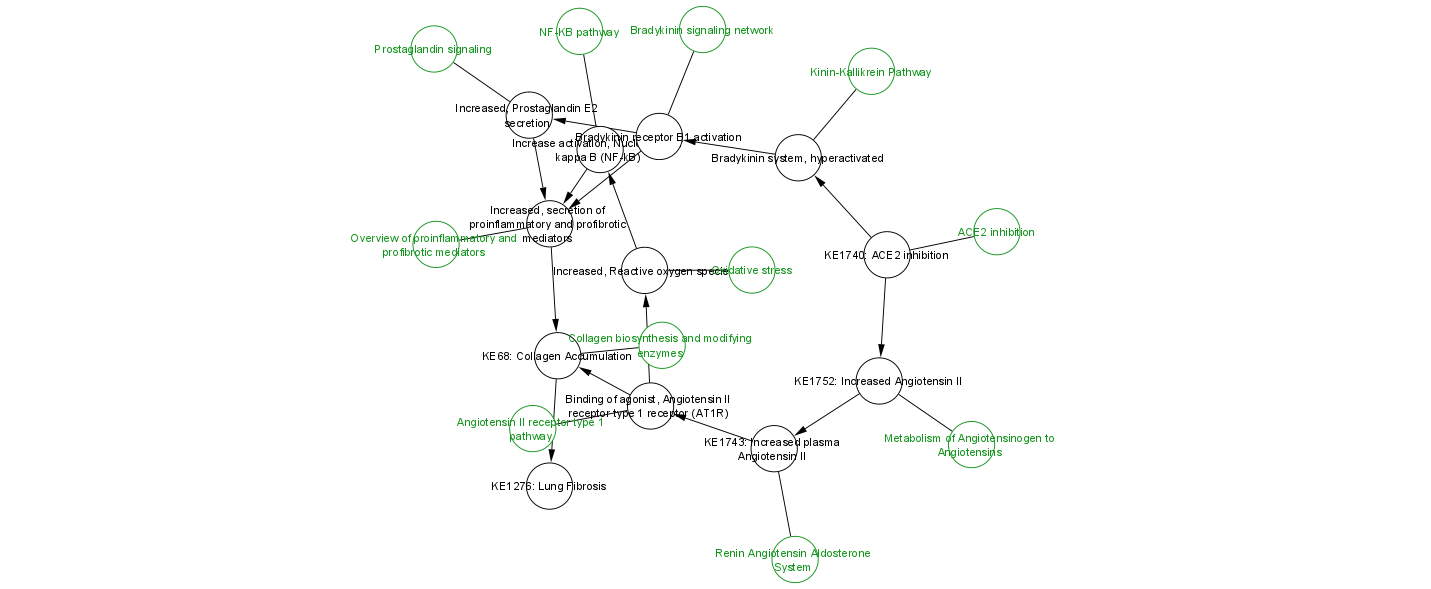

In [4]:
import IPython
p4c.export_image(filename='loaded_network.png')
p4c.sandbox_get_from('loaded_network.png')
from IPython.display import Image
Image('loaded_network.png')

### Step 4a: Extending the network   

For this you use the CyTargetLinker App on Cytoscape as well as a CyTargetLinker Linkset. First we define where to find our linkset.  
Next we assign the path to our linkset and the name of our linkset to a new variable. 

We then use a new command line to extend our pathway. 

In [5]:
path = 'C:/Users/stefa/Documents/GitHub/2021-internship/newFolder2/'

linkset = path + 'wikipathways-feb2021.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 1',
 'Linkset: WikiPathways-BBS3004_Homo sapiens_20210312',
 'Added edges: 125',
 'Added nodes: 116']

### Step 4b: Viewing our output in Jupyter

Our output can now be viewed in Cytoscape. If you want to view it in Jupyter, you can simply reuse the code that was written in step 3b. 

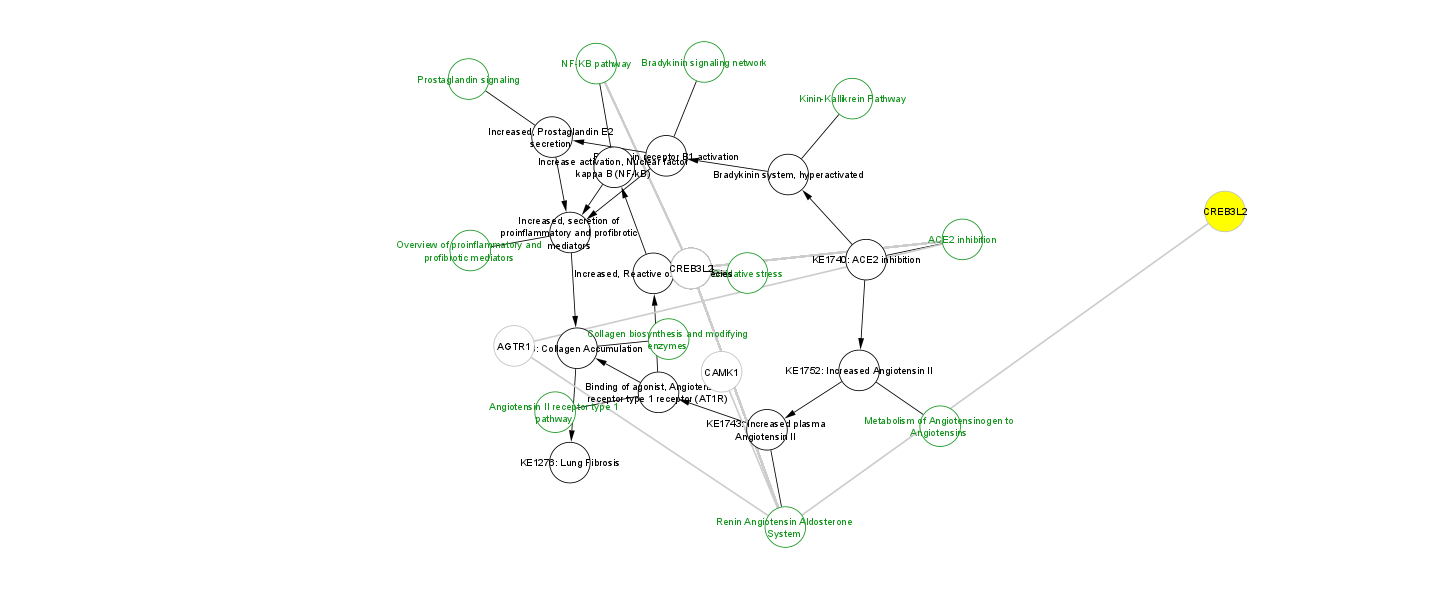

In [8]:
p4c.export_image(filename='ext_net_raw.png')
p4c.sandbox_get_from('ext_net_raw.png')
from IPython.display import Image
Image('ext_net_raw.png')

### Step 5a:Loading a visual style

As you can see from the image above, all nodes were added in the same place. This makes it difficult to read our network. Lets fix that!  
First we will need to load a visual style into our session. My visual style is in the same location as my linkset, so I can reuse the 'path' variable. 

In [ ]:
vizstyle = path+ "newstyleV1.xml"
LoadStylecmd = "".join(['vizmap load file file="',vizstyle,'"'])
p4c.commands.commands_get(LoadStylecmd)

### Step 5b: Applying the visual style to our network

### Step 5c: Viewing our output in Jupyter